In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Read and Check raw data

In [2]:
# Read the csv file and check the top 5 rows
heart = pd.read_csv("https://github.com/Junmingyi0112/accy512project/raw/main/heart_2020_cleaned.csv")
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
heart.Diabetic.value_counts()
# Since we want to diagnose as Yes for heart-disease, even if there is a slightest chance, let us consider borderline diabetic and pregnancy diabetic as No.
heart['Diabetic'] = heart.Diabetic.apply(lambda x: 'No' if x == 'No, borderline diabetes' or x == 'Yes (during pregnancy)' else x)
heart.Diabetic.value_counts()

Diabetic
No     278993
Yes     40802
Name: count, dtype: int64

In [4]:
heart.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

# Data Cleaning
## Convert category variables

In [5]:
# Notice that we have a few categorical variables with Yes/No values. Let us convert them to binary 1/0
column_yesno = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

heart[column_yesno] = heart[column_yesno].apply(lambda x: x.map({'Yes':1,'No':0}))
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [6]:
# Check the data
heart.info()
heart_orig = heart

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [7]:
# heart.to_csv("heart.csv", index=False)

# Data Anlysis
## EDA

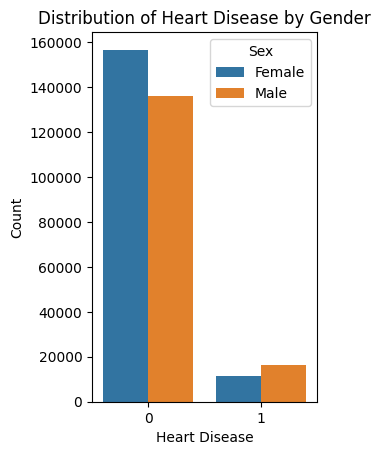

In [8]:
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
sns.countplot(x='HeartDisease',hue='Sex', data=heart)
plt.title('Distribution of Heart Disease by Gender')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

## Model

In [9]:
# Build a logistic regression model with Statsmodels with all columns
logit = smf.logit('HeartDisease~ BMI + C(Sex) + C(GenHealth) + C(Smoking) + C(AlcoholDrinking) + PhysicalHealth + MentalHealth + C(DiffWalking) + C(Race) + C(Diabetic) + C(PhysicalActivity)  + SleepTime + C(AgeCategory)', data=heart).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.231454
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:               319795
Model:                          Logit   Df Residuals:                   319763
Method:                           MLE   Df Model:                           31
Date:                Sat, 02 Dec 2023   Pseudo R-squ.:                  0.2080
Time:                        21:06:59   Log-Likelihood:                -74018.
converged:                       True   LL-Null:                       -93453.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -6.2482      0.114    -54.780      0.